# Assignment 2
## due 10/01 before class via email to matthesc@iu.edu

In class we studied the problem of predicting whether the US is in a recession (as dated by the NBER) in date $t$ by looking at the unemployment rate at date $t$:
$$Pr(Recession_t|U_t) $$
A maybe more interesting question is whether we can predict recessions $h$ months ahead using a vector of predictors:
$$Pr(Recession_{t+h}|X_t) $$

This assignment asks you to carry our such an analysis. Carry out your analysis for a set of different values of $h$: $h=0,1,...,12$, where $h$ is measured in months.

$X_t$ should include the unemployment rate, but also other indicators you think could be useful to predict recessions. Examples include IP growth, inflation, and measures of financial market conditions. Note that your right hand side variables should not have a clear trend (why?).

Please estimate $Pr(Recession_{t+h}|X_t) $ using all three of the following:
1. linear probability model
1. Probit
1. logit

Then produce one figure for each $h$ that plots the three predicted probabilities. Try to interpret the differences between the probabilities for different values of $h$, in particular the difference between the probabilities for small $h$ and large values of $h$. 

In [1]:
import numpy as np
import statsmodels.api as sm
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr

start_date = datetime.datetime(1960,1,1)
end_date = datetime.datetime.now()
DATA=pdr.get_data_fred(['UNRATE','USREC',], start_date,end_date)
#NBER=pdr.get_data_fred('USREC', start_date,end_date)


plt.figure(1)
DATA['UNRATE'].plot()
plt.title('Unemployment')
plt.show()
plt.figure(2)
DATA['USREC'].plot()
plt.title('NBER recessions')
plt.show()

#add constant
DATA['constant']=1

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Everything above this is copied from the lim_dep notebook for reference. 

In [2]:
DATA['Lag_USREC1'] = DATA['USREC'].shift(-1)
DATA.head()

,UNRATE,USREC,constant,Lag_USREC1
DATE,,,,
1960-01-01,5.2,0,1,0.0
1960-02-01,4.8,0,1,0.0
1960-03-01,5.4,0,1,0.0
1960-04-01,5.2,0,1,1.0
1960-05-01,5.1,1,1,1.0


In [3]:
DATA = DATA[np.isfinite(DATA['Lag_USREC1'])]
DATA.head()

,UNRATE,USREC,constant,Lag_USREC1
DATE,,,,
1960-01-01,5.2,0,1,0.0
1960-02-01,4.8,0,1,0.0
1960-03-01,5.4,0,1,0.0
1960-04-01,5.2,0,1,1.0
1960-05-01,5.1,1,1,1.0


The code above lags the USREC variable forward an observation, making this a lagged regresion. The np.isfinite command is critial given the lag. Without it their is a missing observation, making plotting the data very difficult. 

                            OLS Regression Results                            
Dep. Variable:             Lag_USREC1   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.133
Date:                Mon, 30 Sep 2019   Prob (F-statistic):             0.0238
Time:                        23:25:29   Log-Likelihood:                -232.97
No. Observations:                 715   AIC:                             469.9
Df Residuals:                     713   BIC:                             479.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0238      0.049      0.490      0.6

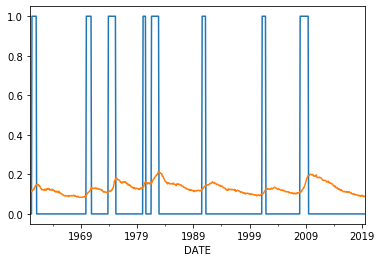

In [4]:
reg1 = sm.OLS(endog=DATA['Lag_USREC1'], exog=DATA[['constant', 'UNRATE']], missing='drop', )
ols_results=reg1.fit()


print(ols_results.summary())
NBER_predict=ols_results.predict()
DATA['OLS_PREDICT']=NBER_predict

plt.figure(3)
DATA['USREC'].plot()
DATA['OLS_PREDICT'].plot()
#plt.legend('true','OLS prediction')
plt.show()

This is the first regresion with just unemployment as a lagged variable. 

In [11]:
start_date = datetime.datetime(1960,1,1)
end_date = datetime.datetime.now()
df1 = pdr.get_data_fred(['UNRATE','USREC','FPCPITOTLZGUSA'], start_date,end_date)
df1['Lag_USREC1'] = df1['USREC'].shift(-1)
df1['constant']=1
df1.head()

,UNRATE,USREC,FPCPITOTLZGUSA,Lag_USREC1,constant
DATE,,,,,
1960-01-01,5.2,0,1.457976,0.0,1
1960-02-01,4.8,0,NaN,0.0,1
1960-03-01,5.4,0,NaN,0.0,1
1960-04-01,5.2,0,NaN,1.0,1
1960-05-01,5.1,1,NaN,1.0,1


In [17]:
df1 = df1[np.isfinite(df1['Lag_USREC1'])]
df1 = df1[np.isfinite(df1['FPCPITOTLZGUSA'])]
df1.head()

,UNRATE,USREC,FPCPITOTLZGUSA,Lag_USREC1,constant
DATE,,,,,
1960-01-01,5.2,0,1.457976,0.0,1
1961-01-01,6.6,1,1.070724,1.0,1
1962-01-01,5.8,0,1.198773,0.0,1
1963-01-01,5.7,0,1.239669,0.0,1
1964-01-01,5.6,0,1.278912,0.0,1


                            OLS Regression Results                            
Dep. Variable:             Lag_USREC1   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     4.280
Date:                Mon, 30 Sep 2019   Prob (F-statistic):             0.0186
Time:                        23:46:22   Log-Likelihood:                -19.170
No. Observations:                  59   AIC:                             44.34
Df Residuals:                      56   BIC:                             50.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          -0.1413      0.186     -0.

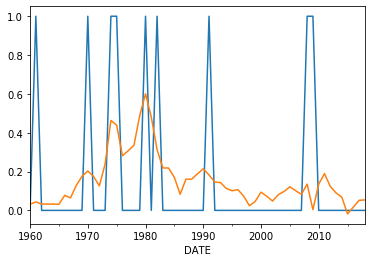

In [18]:
reg2 = sm.OLS(endog=df1['Lag_USREC1'], exog=df1[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
ols_results=reg2.fit()


print(ols_results.summary())
NBER_predict=ols_results.predict()
df1['OLS_PREDICT']=NBER_predict

plt.figure(3)
df1['Lag_USREC1'].plot()
df1['OLS_PREDICT'].plot()
#plt.legend('true','OLS prediction')

This is the same OLS version of the regression with inflation added as a predictor variable. Apparently this makes the unemployment rate statistically insignificant. This isn't a very good model given its poor R squared and dispirit cycles. Next I'll run the logit and probit models with this data to see if it does any better.

Optimization terminated successfully.
         Current function value: 0.371883
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Lag_USREC1   No. Observations:                   59
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                  0.1293
Time:                        09:40:11   Log-Likelihood:                -21.941
converged:                       True   LL-Null:                       -25.199
Covariance Type:            nonrobust   LLR p-value:                   0.03849
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          -3.9786      1.680     -2.368      0.018      -7.271      -0.686
UNRATE           

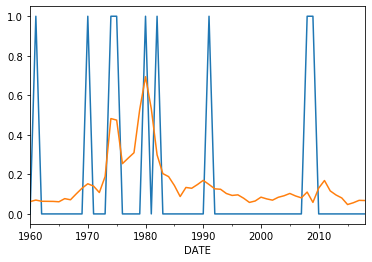

In [34]:
reg3 = sm.Logit(endog=df1['Lag_USREC1'], exog=df1[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
logit_results=reg3.fit()


print(logit_results.summary())
NBER_predict=logit_results.predict()
df1['OLS_PREDICT']=NBER_predict

plt.figure(3)
df1['Lag_USREC1'].plot()
df1['OLS_PREDICT'].plot()

Optimization terminated successfully.
         Current function value: 0.373258
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:             Lag_USREC1   No. Observations:                   59
Model:                         Probit   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                  0.1261
Time:                        09:40:24   Log-Likelihood:                -22.022
converged:                       True   LL-Null:                       -25.199
Covariance Type:            nonrobust   LLR p-value:                   0.04174
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          -2.3375      0.915     -2.554      0.011      -4.132      -0.544
UNRATE           

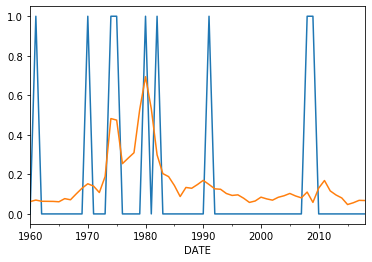

In [35]:
reg4 = sm.Probit(endog=df1['Lag_USREC1'], exog=df1[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
probit_results=reg4.fit()


print(probit_results.summary())
NBER_predict=logit_results.predict()
df1['OLS_PREDICT']=NBER_predict

plt.figure(3)
df1['Lag_USREC1'].plot()
df1['OLS_PREDICT'].plot()

Everything above is using a one month lag. Below I'll use a three month lag to see if that makes a difference.

In [25]:
start_date = datetime.datetime(1960,1,1)
end_date = datetime.datetime.now()
df2 = pdr.get_data_fred(['UNRATE','USREC','FPCPITOTLZGUSA'], start_date,end_date)
df2['Lag_USREC1'] = df1['USREC'].shift(-3)
df2['constant']=1
df2 = df2[np.isfinite(df2['Lag_USREC1'])]
df2 = df2[np.isfinite(df2['FPCPITOTLZGUSA'])]

df2.head()

,UNRATE,USREC,FPCPITOTLZGUSA,Lag_USREC1,constant
DATE,,,,,
1960-01-01,5.2,0,1.457976,0.0,1
1961-01-01,6.6,1,1.070724,0.0,1
1962-01-01,5.8,0,1.198773,0.0,1
1963-01-01,5.7,0,1.239669,0.0,1
1964-01-01,5.6,0,1.278912,0.0,1


                            OLS Regression Results                            
Dep. Variable:             Lag_USREC1   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.345
Date:                Tue, 01 Oct 2019   Prob (F-statistic):              0.269
Time:                        00:15:22   Log-Likelihood:                -16.111
No. Observations:                  56   AIC:                             38.22
Df Residuals:                      53   BIC:                             44.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant           0.3285      0.188      1.

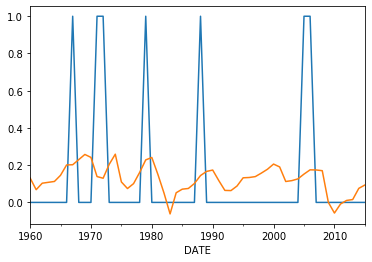

In [28]:
reg5 = sm.OLS(endog=df2['Lag_USREC1'], exog=df2[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
ols_results=reg5.fit()


print(ols_results.summary())
NBER_predict=ols_results.predict()
df2['OLS_PREDICT']=NBER_predict

plt.figure(3)
df2['Lag_USREC1'].plot()
df2['OLS_PREDICT'].plot()

Optimization terminated successfully.
         Current function value: 0.349752
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Lag_USREC1   No. Observations:                   56
Model:                          Logit   Df Residuals:                       53
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                 0.07171
Time:                        00:16:52   Log-Likelihood:                -19.586
converged:                       True   LL-Null:                       -21.099
Covariance Type:            nonrobust   LLR p-value:                    0.2202
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant           0.3149      1.856      0.170      0.865      -3.324       3.953
UNRATE           

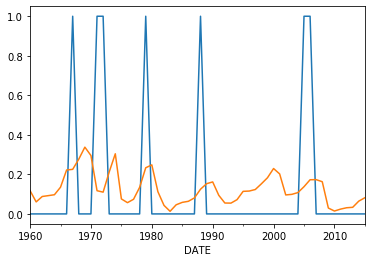

In [29]:
reg6 = sm.Logit(endog=df2['Lag_USREC1'], exog=df2[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
logit_results=reg6.fit()


print(logit_results.summary())
NBER_predict=logit_results.predict()
df2['OLS_PREDICT']=NBER_predict

plt.figure(3)
df2['Lag_USREC1'].plot()
df2['OLS_PREDICT'].plot()

Optimization terminated successfully.
         Current function value: 0.346968
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:             Lag_USREC1   No. Observations:                   56
Model:                         Probit   Df Residuals:                       53
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                 0.07910
Time:                        09:43:29   Log-Likelihood:                -19.430
converged:                       True   LL-Null:                       -21.099
Covariance Type:            nonrobust   LLR p-value:                    0.1885
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant           0.1919      1.062      0.181      0.857      -1.890       2.273
UNRATE           

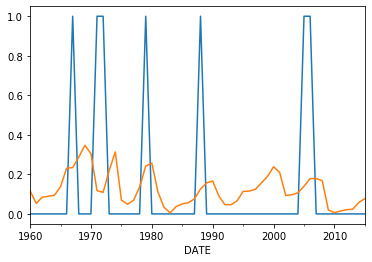

In [37]:
reg7 = sm.Probit(endog=df2['Lag_USREC1'], exog=df2[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
probit_results=reg7.fit()


print(probit_results.summary())
NBER_predict=probit_results.predict()
df2['OLS_PREDICT']=NBER_predict

plt.figure(3)
df2['Lag_USREC1'].plot()
df2['OLS_PREDICT'].plot()

Finally I'll make the lag six months.

In [39]:
start_date = datetime.datetime(1960,1,1)
end_date = datetime.datetime.now()
df3 = pdr.get_data_fred(['UNRATE','USREC','FPCPITOTLZGUSA'], start_date,end_date)
df3['Lag_USREC1'] = df1['USREC'].shift(-6)
df3['constant']=1
df3 = df3[np.isfinite(df3['Lag_USREC1'])]
df3 = df3[np.isfinite(df3['FPCPITOTLZGUSA'])]

df3.head()

,UNRATE,USREC,FPCPITOTLZGUSA,Lag_USREC1,constant
DATE,,,,,
1960-01-01,5.2,0,1.457976,0.0,1
1961-01-01,6.6,1,1.070724,0.0,1
1962-01-01,5.8,0,1.198773,0.0,1
1963-01-01,5.7,0,1.239669,0.0,1
1964-01-01,5.6,0,1.278912,1.0,1


                            OLS Regression Results                            
Dep. Variable:             Lag_USREC1   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.4226
Date:                Tue, 01 Oct 2019   Prob (F-statistic):              0.658
Time:                        09:50:15   Log-Likelihood:                -17.360
No. Observations:                  53   AIC:                             40.72
Df Residuals:                      50   BIC:                             46.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant           0.3020      0.198      1.

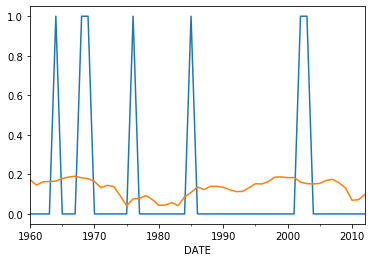

In [40]:
reg8 = sm.OLS(endog=df3['Lag_USREC1'], exog=df3[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
ols_results=reg8.fit()


print(ols_results.summary())
NBER_predict=ols_results.predict()
df3['OLS_PREDICT']=NBER_predict

plt.figure(3)
df3['Lag_USREC1'].plot()
df3['OLS_PREDICT'].plot()

Optimization terminated successfully.
         Current function value: 0.381298
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Lag_USREC1   No. Observations:                   53
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                 0.02310
Time:                        09:51:41   Log-Likelihood:                -20.209
converged:                       True   LL-Null:                       -20.687
Covariance Type:            nonrobust   LLR p-value:                    0.6202
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          -0.2775      1.783     -0.156      0.876      -3.772       3.216
UNRATE           

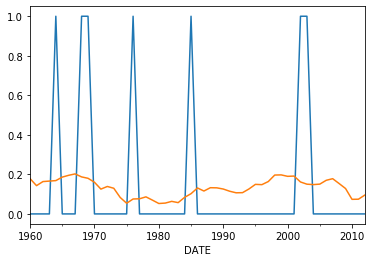

In [41]:
reg9 = sm.Logit(endog=df3['Lag_USREC1'], exog=df3[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
logit_results=reg9.fit()


print(logit_results.summary())
NBER_predict=logit_results.predict()
df3['OLS_PREDICT']=NBER_predict

plt.figure(3)
df3['Lag_USREC1'].plot()
df3['OLS_PREDICT'].plot()

Optimization terminated successfully.
         Current function value: 0.381210
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:             Lag_USREC1   No. Observations:                   53
Model:                         Probit   Df Residuals:                       50
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                 0.02332
Time:                        09:52:39   Log-Likelihood:                -20.204
converged:                       True   LL-Null:                       -20.687
Covariance Type:            nonrobust   LLR p-value:                    0.6173
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          -0.2695      0.938     -0.287      0.774      -2.108       1.569
UNRATE           

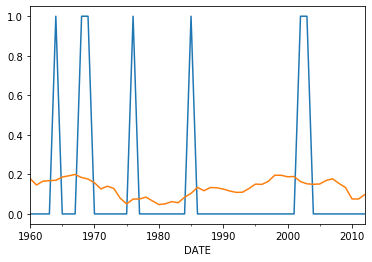

In [42]:
reg10 = sm.Probit(endog=df3['Lag_USREC1'], exog=df3[['constant', 'UNRATE','FPCPITOTLZGUSA']], missing='drop', )
probit_results=reg10.fit()


print(probit_results.summary())
NBER_predict=probit_results.predict()
df3['OLS_PREDICT']=NBER_predict

plt.figure(3)
df3['Lag_USREC1'].plot()
df3['OLS_PREDICT'].plot()

It would appear that as the lag gets larger, the predictions become even more unrealiable. This shows how difficult it is to predict recessions, and unless I am missing an amazing predictor variable it is unlikely that anyone can predict a recession with any real degree of accuracy.